# Fundamentos de Machine Learning
## Trabajo Final de Curso 2022
---

### Profesor: RICARDO DARIO PÉREZ PRINCIPI

### Alumnos:

        ♀ Agustina Lucía Jurgiel
            email: -

        ♂ Facundo Esteban Palermo
            email: facundo.e.palermo@gmail.com

En base al dataset de [Kagle](https://www.kaggle.com/datasets/utkarshsaxenadn/animal-image-classification-dataset) seleccionado sobre animales, construimos un único dataset en base a las imágenes que el original contenía. El dataset final se puede descargar desde [aquí](https://drive.google.com/file/d/1NtfDPgy1wZeO4Y5jD6FXHCSwFq3_auY_/view?usp=sharing).

El dataset contiene 10 carpetas con imágenes de especies de animales, a saber, Zebras, Gorillas, Vacas, Elefantes, Pandas, Hipopótamos Tigres, Perros, Monos y Gatos


## El problema
El problema a resolver es poder predecir e indentificar la especie animal correspondiente a nuevas imágenes.

## Análisis del problema
Debido a que se quiere poder predecir e identificar a que clase corresponde una imágen dada, se debe entrenar un sistema capaz de clasificar según clases.
Dado que se dispone de un dataset con diez especies identificadas, se trata de un problema de `clasificación` `multiclase` donde la variable de entrada serán las imágenes del dataset y la salida la clase a la que pertenece.

## Solución propuesta
Para resolver el problema planteado haciendo uso de Deep Learning, implemetamos una `Red Neuronal Convolucional` (CNN - Convolutional Neural Network) con el fin de entrenarla con el dataset generado, y así pode predecir e identificar la especie animal correspondiente.

# Consideraciones especiales:
El sistema puede ser utilizado para analizar cualquier dataset siempre que se lo prepare de la siguiente manera:

- carpeta
  - clase1
    - clase1.jpg
    - imagen2.png
    - 123456.jpg
  - clase2
      - clase2.jpg
      - imagen2.png
      - abcd.jpg
  - claseN
      - etc...

Por supuesto que dependiendo de la cantidad y calidad de las imágenes del dataset, la configuración del modelo variará. Este modelo está preparado para este problema específico.

Es importante señalar que, a pesar de hacer algunas limpiezas de variables no utilizadas, cuando las imágenes superan cierta dimesión, la versión gratuita del colab crashea por falta de memoria RAM.

Para mejores resultados, se puede recurrir al servicio de pago o utilizando otro entorno, por ejemplo uno personal.


In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

In [2]:
#!unzip drive/MyDrive/dataset/animales.zip -d .

## Bibliotecas y librerías requeridas

Para el entranamiento de la CNN se utiliza [Keras](https://keras.io/), que es una biblioteca de Redes Neuronales de Código Abierto.

El modelo será Sequential, con:
- 4 capas convolucionales 2D (2DConv) de 16, 32, 64 y 128 neuronas respectivamente.
- 2 capas densas (Dense) para de 128 y 10 neuronas (10 por las clases)

Ademas se utiliza algunas bibliotecas y librerías para el manejo de los datos, tal como numpy, pandas, matplotlib (para gráficos), sklearn para generar los datos de training, test, validación y el reporte final.

In [3]:
import numpy as np
from numpy import asarray
from numpy import save
from numpy import load

import pandas as pd

import os
import re

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import keras
from keras.utils import to_categorical
from keras import Input
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers import LeakyReLU
from keras.utils import load_img , img_to_array
from keras.optimizers import Adam

from skimage.transform import resize

### Configuraciones iniciales

Las siguientes constantes se pueden y deben configurar:

- `INIT_LR` : tasa de aprendizaje o learning rate a utilizar en el optimizador elegido. Para este caso Adam (Adaptive Moment Estimation - Estimación Adaptativa de Momentos)
- `EPOCHS` : Iteraciones del algorítmo de aprendizaje a completar
- `BATCH_SIZE` : Tamaño batch de imágenes a procesar batch_size
- `IMG_HEIGHT` : Alto de las imágenes a procesar (a convertir)
- `IMG_WIDTH` : Ancho de las imágenes a procesar (a convertir)
- `DATASET`: nombre de la carpeta con el dataset


In [4]:
INIT_LR = 0.001
EPOCHS = 15
BATCH_SIZE = 64
IMG_HEIGHT = 200
IMG_WIDTH = 200
DATASET = 'animales'

## Definición del modelo

Esta función retorna el modelo a utilizar. Espera por parámetro la cantidad de clases de salida.

Como se indicó antes, el modelo fue ajustado con
- 4 capas convolucionales 2D (2DConv) de 16, 32, 64 y 128 neuronas respectivamente.
- 2 capas densas (Dense) para de 128 y 10 neuronas (10 por las clases)

Como funcion de activación utilizamos LeakyRelu (Rectifier Linear Unit)

El Dropout es para evitar el overfitting.

Softmax se encarga de pasar a la neurona de salida la probabilidad de que sea una clase u otra.

In [5]:
def cnn_model(cantidad_clases:int):
    model = Sequential()

    #primera capa cnn
    model.add(Conv2D(16, kernel_size=(3, 3), activation='linear', padding='same', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)))
    model.add(LeakyReLU(alpha=0.1)) #funcion de activacion
    model.add(MaxPooling2D((2,2), padding='same'))
    model.add(Dropout(0.2))

    #Crea una capa de 32 neuronas
    model.add(Conv2D(32, kernel_size=(3, 3), activation='linear', padding='same'))
    model.add(LeakyReLU(alpha=0.1))
    model.add(MaxPooling2D((2,2), padding='same'))
    model.add(Dropout(0.2))

    #Crea una capa de 64 neuronas
    model.add(Conv2D(64, kernel_size=(3, 3), activation='linear', padding='same'))
    model.add(LeakyReLU(alpha=0.1))
    model.add(MaxPooling2D((2,2), padding='same'))
    model.add(Dropout(0.2))

    #Crea una capa de 128 neuronas
    model.add(Conv2D(128, kernel_size=(3, 3), activation='linear', padding='same'))
    model.add(LeakyReLU(alpha=0.1))
    model.add(MaxPooling2D((2,2), padding='same'))
    model.add(Dropout(0.2))

    model.add(Flatten())

    #Crea una capa de 128 neuronas
    model.add(Dense(128, activation='linear'))
    model.add(LeakyReLU(alpha=0.1))
    model.add(Dropout(0.5))

    # otra capa, de n_classes neuronas: salidas, softmax es un optimizador
    model.add(Dense(cantidad_clases, activation='softmax'))
    opt = Adam(learning_rate=0.001)
    
    model.summary()

    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

    return model


## Función de carga del dataset
Se encarga de recorrer cada directorio y subdirectorio para obtener las imagenes a procesar. Es importante observar que el listado de las clases, provienen del nombre de los directorios.

Esta función redimenciona la imágenes haciendo uso de la funcion load_img() al tamaño definido en IMG_HEIGHT y IMG_WIDTH.

Finalmente retorna una lista con las imágenes redimencionadas, las etiquetas valores de 0 a cantidad segun la clase que es, y un listado del nombre de las clases (carpetas)

In [6]:
def cargar_imagenes(carpeta: str):
    dirname = os.path.join(os.getcwd(), carpeta)
    imgpath = dirname + os.sep

    images = [] # lista a retornar
    labels = [] # lista a retornar
    classes = [] # lista a retornar

    directories = []
    dircount = []
    prevRoot = ''
    cant = 0
    indice = 0

    for root, dirnames, filenames in os.walk(imgpath):
        for filename in filenames:
            if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename):
                cant=cant+1
                filepath = os.path.join(root, filename)

                image = load_img(filepath, target_size=(IMG_HEIGHT, IMG_WIDTH))
                image = img_to_array(image)
                images.append(image)
                
                b = "Leyendo..." + str(cant)
                print(b, end="\r")
                if prevRoot != root:
                    print(root, cant)
                    prevRoot=root
                    directories.append(root)
                    dircount.append(cant)
                    cant=0

    dircount.append(cant)
    dircount = dircount[1:]
    dircount[0] = dircount[0]+1

    for cantidad in dircount:
        for i in range(cantidad):
            labels.append(indice)
        indice=indice+1

    print('Carpetas leidas:', len(directories))
    print('Imagenes en cada carpeta', dircount)
    print('Suma Total de imagenes:', sum(dircount))
    print('Cantidad etiquetas creadas: ', len(labels))

    indice=0
    for directorio in directories:
        name = directorio.split(os.sep)
        print(indice , name[len(name)-1])
        classes.append(name[len(name)-1])
        indice=indice+1

    return images, labels, classes

### Carga del dataset
1) Se cargan las imágenes, se las etiqueta y guardan los nombres de las clases. el parámetro 'animales' es el nombre de la carpeta que contiene las subcarpetas de clases.

2) asarray se encarga de convertir las listas en arrays (numpy)

3) del labels, images es para liberar la memoria utilizada al procesar las imágenes, utilizado para poder trabajar especialmente en colab.

In [7]:
images, labels, animales = cargar_imagenes(DATASET)

# salida(y) y entrada(X) en numpy array
y = asarray(labels)
X = asarray(images, dtype=np.uint8)

del labels, images

# obtener las clases
classes = np.unique(y)
n_classes = len(classes)

print('Clases: ', classes)
print('Cantidad: ', n_classes)

c:\Users\facun\Desktop\archive\animales\Cat 1
c:\Users\facun\Desktop\archive\animales\Cow 2499
c:\Users\facun\Desktop\archive\animales\Dog 2282
c:\Users\facun\Desktop\archive\animales\Elephant 2109
c:\Users\facun\Desktop\archive\animales\Gorilla 2322
c:\Users\facun\Desktop\archive\animales\Hippo 2000
c:\Users\facun\Desktop\archive\animales\Monkey 2157
c:\Users\facun\Desktop\archive\animales\Panda 1998
c:\Users\facun\Desktop\archive\animales\Tiger 2334
c:\Users\facun\Desktop\archive\animales\Zebra 2264
Carpetas leidas: 10
Imagenes en cada carpeta [2500, 2282, 2109, 2322, 2000, 2157, 1998, 2334, 2264, 2369]
Suma Total de imagenes: 22335
Cantidad etiquetas creadas:  22335
0 Cat
1 Cow
2 Dog
3 Elephant
4 Gorilla
5 Hippo
6 Monkey
7 Panda
8 Tiger
9 Zebra
Clases:  [0 1 2 3 4 5 6 7 8 9]
Cantidad:  10


### Generación de dataset para entrenar y para testear
- train_X: es la lista de imágenes de entrada para entrenar, un 80% del total
- test_X: es la lista de imágenes de entrada para testear, un 20% del total
- train_Y: es la lista de etiquetas de salida para el entrenamiento, un 80% del total
- test_Y: es la lista de etiquetas de salida para el testeo, un 20% del total

In [8]:
train_X, test_X, train_Y, test_Y = train_test_split(X, y, test_size=0.2)
# (cantidad, alto, ancho, canalesRGB )
print('Training data shape: ', train_X.shape, train_Y.shape)
print('Testing data shape: ', test_X.shape, test_Y.shape)

Training data shape:  (17868, 200, 200, 3) (17868,)
Testing data shape:  (4467, 200, 200, 3) (4467,)


Text(0.5, 1.0, 'Class : 4')

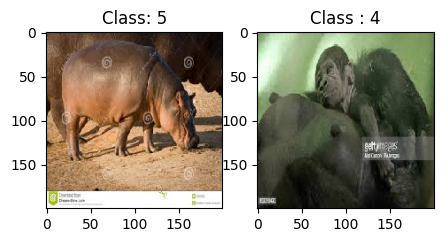

In [9]:
# Prueba de que todo va bien ...
plt.figure(figsize=[5,5])

# Primera del train_X
plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Class: {}".format(train_Y[0]))

# Primera del test_X
plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Class : {}".format(test_Y[0]))

### Preprocesado

Se preprocesan y normalizan las imágenes de 3 canales de colores para que tengan valores entre 0 y 1

Ademas, se hace One-Hot encoding a las etiquetas para que las neuronas trabajen mejor cuando debe clasificar.


In [10]:
#normalizacion
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X/255.0
test_X = test_X/255.0
#divide por 255 por los 3 canales rgb, para que quede entre 0 y 1


# one-hot encoding, va a colocar 1 en el lugar del indice 3 -> 0001000000
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

print('Label original: ', train_Y[0])
print('Luego de one-hot: ', train_Y_one_hot[0])

Label original:  5
Luego de one-hot:  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


### Generación de dataset para entrenar y para validar
- train_X: es la lista de imágenes de entrada para entrenar, un 80% del 80% del total
- valid_X: es la lista de imágenes de entrada para pasar en la validación, un 20% del 80% del total
- train_label: es la lista de etiquetas de salida para el entrenamiento, un 80% del 80% del total
- valid_label: es la lista de etiquetas de salida para la validación, un 20%  del 80% del total

In [11]:
# subdivide para validar
train_X, valid_X, train_label, valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)
print(train_X.shape, valid_X.shape, train_label.shape, valid_label.shape)

(14294, 200, 200, 3) (3574, 200, 200, 3) (14294, 10) (3574, 10)


## Entrenamiento

Finalmente se ejecuta el entrenamiento. Se crea el modelo mediante la función definida anteriormente y se le pasa por parámetro la cantidad de clases. Esto es importante porque reolverá la cantidad de neuronas de salida.

En este proceso se entrena con las imágenes de entradas train_X y sus etiquetas, lo hara 15 veces y validará el aprendizaje con los datos de validación.

Este proceso puede demorar bastante, dependiendo del tamaño de las imágenes, la cantidad de iteraciones, la cantidad de capas y la cantidad de neuronas.

In [12]:
model:Sequential = cnn_model(n_classes)

train = model.fit(train_X, train_label, batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=1, validation_data=(valid_X, valid_label))

model.save(DATASET + ".h5py")

del train_X, valid_X

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 200, 200, 16)      448       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 200, 200, 16)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 100, 100, 16)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 100, 100, 16)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 100, 32)      4640      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 100, 100, 32)      0         
                                                        

INFO:tensorflow:Assets written to: animales.h5py\assets


INFO:tensorflow:Assets written to: animales.h5py\assets


### Evaluación

Se evalúa contra el dataset de testeo que tan preciso es el modelo (% de aciertos entre lo predicho y lo esperado)  y cuanta pérdida hay en el modelo(errores entre salida obtenida y salida esperada) 


In [13]:
test_eval = model.evaluate(test_X, test_Y_one_hot, verbose=1)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

140/140 [==============================] - 10s 73ms/step - loss: 1.2295 - accuracy: 0.7199
Test loss: 1.229472279548645
Test accuracy: 0.7199462652206421


## Visualización de Resultados

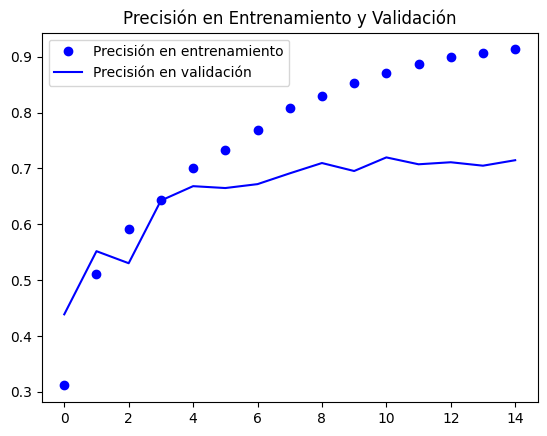

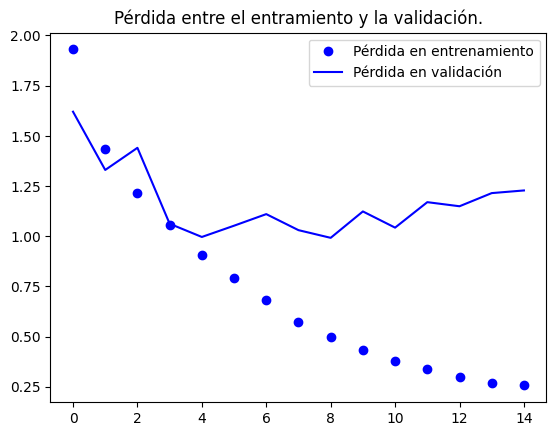

In [14]:
accuracy = train.history['accuracy']
val_accuracy = train.history['val_accuracy']
loss = train.history['loss']
val_loss = train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Precisión en entrenamiento')
plt.plot(epochs, val_accuracy, 'b', label='Precisión en validación')
plt.title('Precisión en Entrenamiento y Validación')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Pérdida en entrenamiento')
plt.plot(epochs, val_loss, 'b', label='Pérdida en validación')
plt.title('Pérdida entre el entramiento y la validación.')
plt.legend()
plt.show()

### Testeo y predicción y resultados

- precision: acierto/(total predicciones)
- recall: acierto/(total de reales)
- F1: (2*P*R)/(P+R)
- suport: entrada del test

In [15]:
predicted_classes2 = model.predict(test_X)

predicted_classes = []
for predicted_animal in predicted_classes2:
    predicted_classes.append(predicted_animal.tolist().index(max(predicted_animal)))

predicted_classes = np.array(predicted_classes)
predicted_classes.shape, test_Y.shape

140/140 [==============================] - 10s 74ms/step


((4467,), (4467,))

In [16]:
target_names = ["Class {}".format(i) for i in range(n_classes)]
print(classification_report(test_Y, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.67      0.72      0.69       533
     Class 1       0.65      0.60      0.63       445
     Class 2       0.69      0.64      0.66       414
     Class 3       0.64      0.82      0.72       468
     Class 4       0.74      0.61      0.67       415
     Class 5       0.61      0.75      0.67       415
     Class 6       0.57      0.53      0.55       398
     Class 7       0.92      0.81      0.86       475
     Class 8       0.79      0.79      0.79       448
     Class 9       0.97      0.88      0.92       456

    accuracy                           0.72      4467
   macro avg       0.73      0.72      0.72      4467
weighted avg       0.73      0.72      0.72      4467



## Predicción e identificación de imágenes

Aquí se utiliza el modelo entrenado para dar por fin a la solución del problema planteado.

In [17]:
images=[]
filenames = ['test/gato.jpg', 'test/vaca.jpg', 'test/perro.jpg', 'test/elefante.jpg', 'test/gorila.jpg', 'test/hipo.jpg', 'test/mono.jpg', 'test/panda.jpg', 'test/tigre.jpg', 'test/zebra.jpg']

for filepath in filenames:
    image = plt.imread(filepath,0)
    image_resized = resize(image, (IMG_HEIGHT, IMG_WIDTH), anti_aliasing=True, clip=False, preserve_range=True)
    images.append(image_resized)

X = np.array(images, dtype=np.uint8) #convierto de lista a numpy
test_X = X.astype('float32')
test_X = test_X / 255.

predicted_classes = model.predict(test_X)

for i, img_tagged in enumerate(predicted_classes):
    print(filenames[i], animales[img_tagged.tolist().index(max(img_tagged))])

1/1 [==============================] - 0s 37ms/step
test/gato.jpg Cat
test/vaca.jpg Cow
test/perro.jpg Dog
test/elefante.jpg Elephant
test/gorila.jpg Gorilla
test/hipo.jpg Hippo
test/mono.jpg Monkey
test/panda.jpg Panda
test/tigre.jpg Tiger
test/zebra.jpg Zebra
